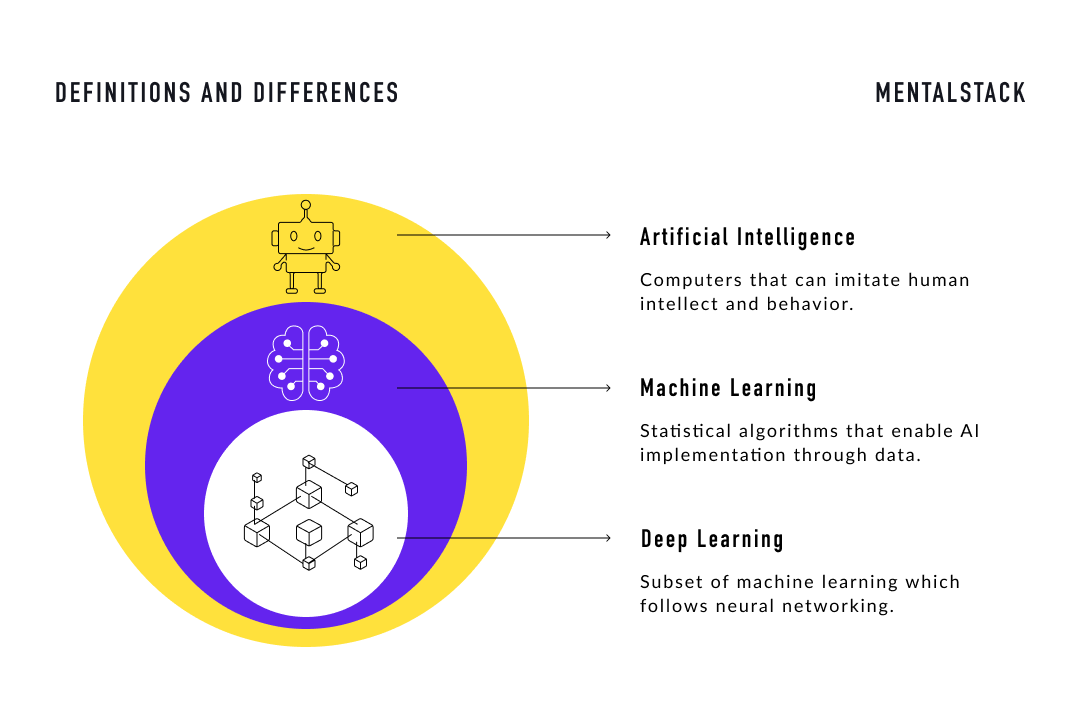

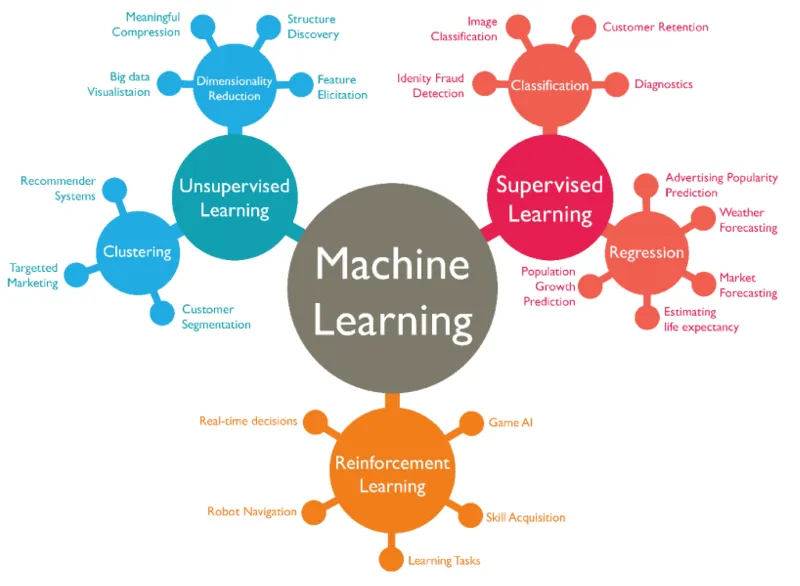

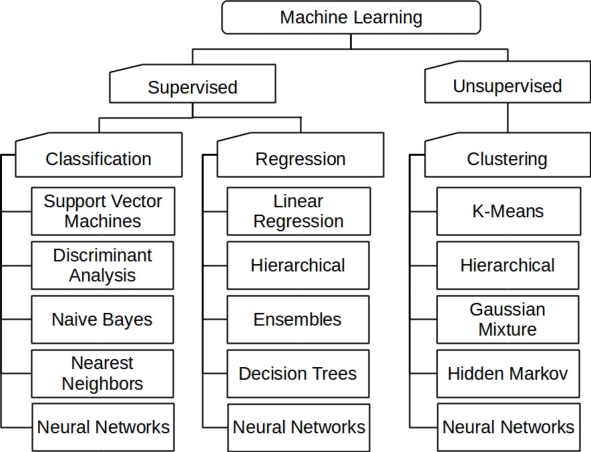

https://scikit-learn.org/stable/supervised_learning.html

# Clase Semana 1

Ronie Martínez

- https://github.com/satencioh/Cleaning_data_Python_Part_1/blob/master/Cleaning_data_Python.ipynb
- https://www.kaggle.com/code/fernandobordi/fb-limpieza-de-datos
- https://medium.com/ironhack/data-cleaning-con-pandas-parte-1-aaa681662b5d
- https://medium.com/ironhack/data-cleaning-con-pandas-parte-2-a4e1f55e446b

## Tipos de datos

* Texto: str
* Entero: int
* Decimal: float
* Binario: bool
* Fecha y hora: datetime
* Categórico: category



```
df.dtypes
```



```
df['<nombre_columna>'].astype(‘<tipo_dato>’)
```



```
#Dejar solo los valores validos
df = df[df['fecha'] < fecha_actual]
#Reemplazar valores
df.loc[df['fecha'] > fecha_actual, 'fecha'] = fecha_actual
#Eliminar valores
df.drop(df[df['fecha'] > fecha_actual].index, inplace = True)
```



```
#Si la columna es tipo dato datetime
df['año'] = df['fecha'].dt.year #Obtener año
df['mes'] = df['fecha'].dt.month #Obtener mes
```






In [ ]:
import pandas as pd
# Create a list of n dates
dates = [pd.to_datetime("2023-12-28") + pd.DateOffset(days=i) for i in range(10)]
# Create a dataframe with the dates
df = pd.DataFrame({"date": dates})
# Print the dataframe
print(df)

        date
0 2023-12-28
1 2023-12-29
2 2023-12-30
3 2023-12-31
4 2024-01-01
5 2024-01-02
6 2024-01-03
7 2024-01-04
8 2024-01-05
9 2024-01-06


In [ ]:
df['year'] = df['date'].dt.year #Obtener año
df['month'] = df['date'].dt.month #Obtener mes
df['day'] = df['date'].dt.day #Obtener mes
df

,date,year,month,day
0,2023-12-28,2023,12,28
1,2023-12-29,2023,12,29
2,2023-12-30,2023,12,30
3,2023-12-31,2023,12,31
4,2024-01-01,2024,1,1
5,2024-01-02,2024,1,2
6,2024-01-03,2024,1,3
7,2024-01-04,2024,1,4
8,2024-01-05,2024,1,5
9,2024-01-06,2024,1,6


In [ ]:
df.dtypes

date     datetime64[ns]
year              int64
month             int64
day               int64
dtype: object

In [ ]:
df['day'] = df['day'].astype(float)
df['month'] = df['month'].astype("category")
df.dtypes

date     datetime64[ns]
year              int64
month          category
day             float64
dtype: object

In [ ]:
df.month

0    12
1    12
2    12
3    12
4     1
5     1
6     1
7     1
8     1
9     1
Name: month, dtype: category
Categories (2, int64): [1, 12]

In [ ]:
import numpy as np
df = pd.DataFrame({"value": np.random.randint(0, 100, 20)})
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df["group"] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)
df.head(10)

,value,group
0,90,90 - 99
1,61,60 - 69
2,36,30 - 39
3,62,60 - 69
4,26,20 - 29
5,55,50 - 59
6,62,60 - 69
7,75,70 - 79
8,29,20 - 29
9,97,90 - 99


## Datos nulos NaN


In [ ]:
import pandas as pd
import numpy as np
# Create a dataframe with 10 rows and 5 columns
df = pd.DataFrame(np.random.randn(10, 5))
# Set some random values to NaN
df.iloc[::2, 1] = np.nan
df.iloc[::5, 3] = np.nan
# Print the dataframe
print(df)

          0         1         2         3         4
0 -0.958753       NaN  1.314102       NaN  0.457903
1 -0.388791  0.471942  0.231040  0.891925  0.468282
2 -0.104977       NaN  1.781359  0.853506  0.942275
3  0.309325  1.233828  0.193558  0.868651 -0.257334
4 -0.525593       NaN  0.460325 -0.762028 -0.150297
5  0.273085 -2.258625  0.019539       NaN -0.895869
6  0.360632       NaN -0.539787 -1.016453 -0.585545
7 -1.096792  0.737053 -0.429816  0.360740 -0.556870
8  0.217466       NaN -2.241259  1.472117  0.674254
9 -0.505465 -0.202291 -0.590585 -0.346621  0.869390


In [ ]:
df.isnull()

,0,1,2,3,4
0,False,True,False,True,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,True,False,False,False
5,False,False,False,True,False
6,False,True,False,False,False
7,False,False,False,False,False
8,False,True,False,False,False
9,False,False,False,False,False


In [ ]:
df.notnull()

,0,1,2,3,4
0,True,False,True,False,True
1,True,True,True,True,True
2,True,False,True,True,True
3,True,True,True,True,True
4,True,False,True,True,True
5,True,True,True,False,True
6,True,False,True,True,True
7,True,True,True,True,True
8,True,False,True,True,True
9,True,True,True,True,True


In [ ]:
df.dropna()

,0,1,2,3,4
1,-0.388791,0.471942,0.231040,0.891925,0.468282
3,0.309325,1.233828,0.193558,0.868651,-0.257334
7,-1.096792,0.737053,-0.429816,0.360740,-0.556870
9,-0.505465,-0.202291,-0.590585,-0.346621,0.869390


In [ ]:
df.isnull().sum()

0    0
1    5
2    0
3    2
4    0
dtype: int64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

In [ ]:
print(df.mean())
df.fillna(df.mean())

0   -0.241986
1   -0.003619
2    0.019848
3    0.290230
4    0.096619
dtype: float64


,0,1,2,3,4
0,-0.958753,-0.003619,1.314102,0.290230,0.457903
1,-0.388791,0.471942,0.231040,0.891925,0.468282
2,-0.104977,-0.003619,1.781359,0.853506,0.942275
3,0.309325,1.233828,0.193558,0.868651,-0.257334
4,-0.525593,-0.003619,0.460325,-0.762028,-0.150297
5,0.273085,-2.258625,0.019539,0.290230,-0.895869
6,0.360632,-0.003619,-0.539787,-1.016453,-0.585545
7,-1.096792,0.737053,-0.429816,0.360740,-0.556870
8,0.217466,-0.003619,-2.241259,1.472117,0.674254
9,-0.505465,-0.202291,-0.590585,-0.346621,0.869390


In [ ]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                   columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [ ]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


In [ ]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


In [ ]:
df.fillna(value=values, limit=1)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,NaN,1.0
2,NaN,1.0,NaN,3.0
3,NaN,3.0,NaN,4.0


In [ ]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [ ]:
display(df)
df.fillna(method="bfill") #bfill, ffill

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,3.0,NaN,4.0
3,NaN,3.0,NaN,4.0


## Datos irrelevantes/redundantes

### Limpieza en columnas: Oil-spill

In [ ]:
# summarize the number of unique values for each column using pandas
from pandas import read_csv
# load the dataset
df = read_csv('data_cols.csv', header=None)
# summarize the number of unique values in each column
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.92,0.17,0.24,85.22,0,0.47,422.12,1.01,12.06,0.21,1.98,-1.27,-0.43,1.94,0.00,1.94
1,0.93,0.18,0.25,85.22,0,0.48,422.12,1.01,12.06,-0.39,1.85,-3.04,-0.51,1.93,0.00,1.93
2,0.87,0.17,0.24,85.22,0,0.45,422.12,1.01,12.06,0.29,4.14,-3.12,-0.26,2.17,0.00,2.17
3,0.89,0.17,0.23,85.22,0,0.46,422.12,1.01,12.06,-0.52,2.45,-2.86,-0.55,1.94,0.00,1.94
4,0.90,0.21,0.31,85.22,0,0.46,422.12,1.01,12.06,0.26,1.97,-2.97,-0.55,1.95,0.00,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.35,0.22,0.26,47.66,0,1.01,204.34,0.97,4.66,0.18,2.16,-1.95,-0.65,1.09,0.01,1.08
296,0.34,0.28,0.37,47.66,0,0.97,204.34,0.97,4.66,0.49,2.49,-3.40,-0.29,1.23,0.00,1.23
297,0.37,0.25,0.27,47.66,0,1.07,204.34,0.97,4.66,0.79,3.62,-2.28,-0.20,1.09,0.00,1.09
298,0.38,0.23,0.29,47.66,0,1.10,204.34,0.97,4.66,-0.79,3.74,-3.09,-0.42,1.23,0.00,1.23


In [ ]:
print(df.nunique())

0      65
1      41
2      55
3       4
4       1
5      48
6       4
7       4
8       4
9     207
10    243
11    208
12     96
13     30
14      2
15     31
dtype: int64


In [ ]:
df_c = df.copy()
# get number of unique values for each column
counts = df_c.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1] # <5
print(to_del)
# drop useless columns
df_c.drop(to_del, axis=1, inplace=True)
print(df_c.shape)

[4]
(300, 15)


In [ ]:
# summarize the percentage of unique values for each column using numpy
df_p = df.copy()
df_p = df_p.nunique() / df_p.shape[0] * 100
df_p

0     21.666667
1     13.666667
2     18.333333
3      1.333333
4      0.333333
5     16.000000
6      1.333333
7      1.333333
8      1.333333
9     69.000000
10    81.000000
11    69.333333
12    32.000000
13    10.000000
14     0.666667
15    10.333333
dtype: float64

In [ ]:
df_p = df.copy()
# get number of unique values for each column
counts = df_p.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df_p.shape[0]*100) < 3]
print(to_del)
# drop useless columns
df_p.drop(to_del, axis=1, inplace=True)
print(df_p.shape)

[3, 4, 6, 7, 8, 14]
(300, 10)


https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [ ]:
# example of applying the variance threshold for feature selection
from sklearn.feature_selection import VarianceThreshold
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(300, 15) (300,)
(300, 14)


### Limpieza en filas: Iris

In [ ]:
# locate rows of duplicate data
from pandas import read_csv
# load the dataset
df = read_csv('data_rows.csv', header=None)
display(df)

,0,1,2
0,5.0,3.0,1.6
1,5.0,3.4,1.6
2,5.2,3.5,1.5
3,5.2,3.4,1.4
4,4.7,3.2,1.6
...,...,...,...
70,5.7,3.0,4.2
71,5.7,2.9,4.2
72,6.2,2.9,4.3
73,5.1,2.5,3.0


In [ ]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
      0    1    2
12  4.9  3.1  1.5


In [ ]:
df[df[0]==4.9] #4.9, 5.8

,0,1,2
9,4.9,3.1,1.5
12,4.9,3.1,1.5
32,4.9,2.4,3.3


In [ ]:
df_d = df.copy()
print(df_d.shape)
# delete duplicate rows
df_d.drop_duplicates(inplace=True)
print(df_d.shape)

(75, 3)
(74, 3)


## Datos erróneos

In [ ]:
import pandas as pd
#Primero ordenaremos la información creando un DataFrame
inventario = pd.DataFrame({"Dias en Inventario": ["23", "24", "##", "14", "12", "10", "35","##","40","##"],
                   "Precio Promedio": ["23", "24", "18", "14", "46", "44", "35","41","15","9"],
                   "Tipo de Inventario": ["A", "B", "C","B", "C", "C", "A","A","B","C"],
                   "Revision Calidad": [1, 1, 0, 1, 0, 0, 1, 1, 0, 0]})
display(inventario)

,Dias en Inventario,Precio Promedio,Tipo de Inventario,Revision Calidad
0,23,23,A,1
1,24,24,B,1
2,##,18,C,0
3,14,14,B,1
4,12,46,C,0
5,10,44,C,0
6,35,35,A,1
7,##,41,A,1
8,40,15,B,0
9,##,9,C,0


In [ ]:
print(inventario.mean()) # ['Dias en Inventario'], Precio Promedio

TypeError: Could not convert ['2324##14121035##40##' '2324181446443541159' 'ABCBCCAABC'] to numeric

In [ ]:
inventario.isnull()

,Dias en Inventario,Precio Promedio,Tipo de Inventario,Revision Calidad
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [ ]:
#Creamos una nueva columna con los valores ya reemplazados.
for dias in inventario.iterrows():
    index_value, column_values=dias
    arreglo=int(column_values['Dias en Inventario'].replace('##','22'))
    inventario.at[index_value,'Dias Inventario Corregido']=arreglo

display(inventario)

,Dias en Inventario,Precio Promedio,Tipo de Inventario,Revision Calidad,Dias Inventario Corregido
0,23,23,A,1,23.0
1,24,24,B,1,24.0
2,##,18,C,0,22.0
3,14,14,B,1,14.0
4,12,46,C,0,12.0
5,10,44,C,0,10.0
6,35,35,A,1,35.0
7,##,41,A,1,22.0
8,40,15,B,0,40.0
9,##,9,C,0,22.0


In [ ]:
#Eliminamos Dias en Inventario.
inventario.drop(axis=1, columns='Dias en Inventario')

,Precio Promedio,Tipo de Inventario,Revision Calidad,Dias Inventario Corregido
0,23,A,1,23.0
1,24,B,1,24.0
2,18,C,0,22.0
3,14,B,1,14.0
4,46,C,0,12.0
5,44,C,0,10.0
6,35,A,1,35.0
7,41,A,1,22.0
8,15,B,0,40.0
9,9,C,0,22.0


In [ ]:
inventario['Dias Inventario Corregido'].mean()

22.4

### Missing Values: Pima Indians Diabetes

In [ ]:
# load and summarize the dataset
from pandas import read_csv
# load the dataset
dataset = read_csv('data_mval.csv', header=None)
display(dataset)

,0,1,2,3,4,5
0,2,71,25.2,0.313,21,0
1,3,0,37.2,0.267,28,0
2,6,0,39.0,0.727,41,1
3,7,79,33.3,0.738,41,0
4,3,0,37.3,0.238,40,0
...,...,...,...,...,...,...
145,2,440,39.4,0.134,30,0
146,1,144,23.4,0.447,33,1
147,0,159,37.8,0.455,22,1
148,11,130,28.3,0.260,42,1


In [ ]:
# summarize the dataset
display(dataset.describe().T)

,count,mean,std,min,25%,50%,75%,max
0,150.0,3.766667,3.416141,0.000,1.000,3.0000,6.000,13.000
1,150.0,73.933333,99.759285,0.000,0.000,21.5000,126.000,600.000
2,150.0,31.278000,6.680281,0.000,27.025,31.4500,35.425,46.800
3,150.0,0.453287,0.318277,0.085,0.206,0.3545,0.658,1.699
4,150.0,32.866667,11.821756,21.000,23.250,28.0000,40.750,67.000
5,150.0,0.273333,0.447164,0.000,0.000,0.0000,1.000,1.000


In [ ]:
# example of summarizing the number of missing values for each variable
# count the number of missing values for each column
num_missing = (dataset[[1,2]] == 0).sum()
# report the results
print(num_missing)

1    73
2     1
dtype: int64


In [ ]:
# example of marking missing values with nan values
from numpy import nan
# replace '0' values with 'nan'
dataset[[1,2]] = dataset[[1,2]].replace(0, nan)
# count the number of nan values in each column
print(dataset.isnull().sum())

0     0
1    73
2     1
3     0
4     0
5     0
dtype: int64


In [ ]:
# example of review data with missing values marked with a nan
# summarize the first 20 rows of data
display(dataset.head(20))

,0,1,2,3,4,5
0,2,71.0,25.2,0.313,21,0
1,3,NaN,37.2,0.267,28,0
2,6,NaN,39.0,0.727,41,1
3,7,79.0,33.3,0.738,41,0
4,3,NaN,37.3,0.238,40,0
5,10,NaN,33.3,0.263,38,0
6,0,90.0,36.5,0.314,35,1
7,1,170.0,28.6,0.692,21,0
8,2,76.0,30.4,0.968,21,0
9,8,NaN,25.0,0.409,64,0


In [ ]:
# example where missing values cause errors
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv('data_mval.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2]] = dataset[[1,2]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

IndexError: index 8 is out of bounds for axis 1 with size 6

In [ ]:
# evaluate model on data after rows with missing data are removed
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv('data_mval.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2]] = dataset[[1,2]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:-1]
y = values[:,-1]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.779


## Outliers / Valores extremos

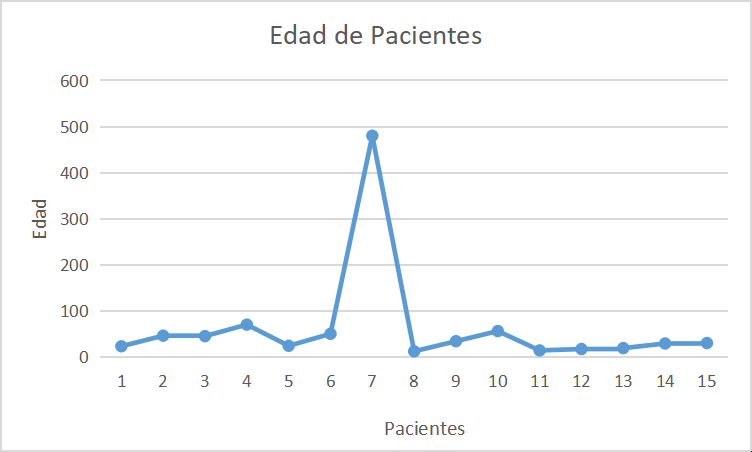

### Método de STD

In [ ]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

mean=50.049 stdv=4.994
Identified outliers: 29
Non-outlier observations: 9971


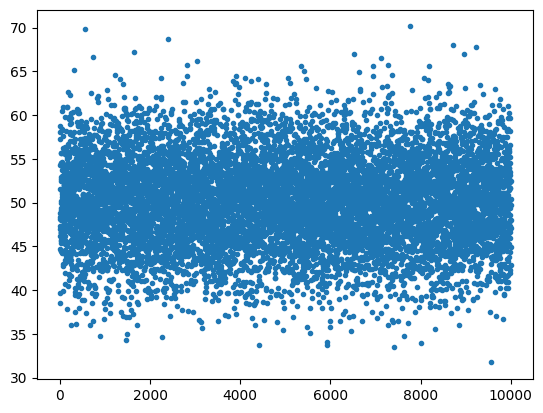

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data,'.')

### Método de rango intercuartil

In [ ]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


### Automatic: Housing

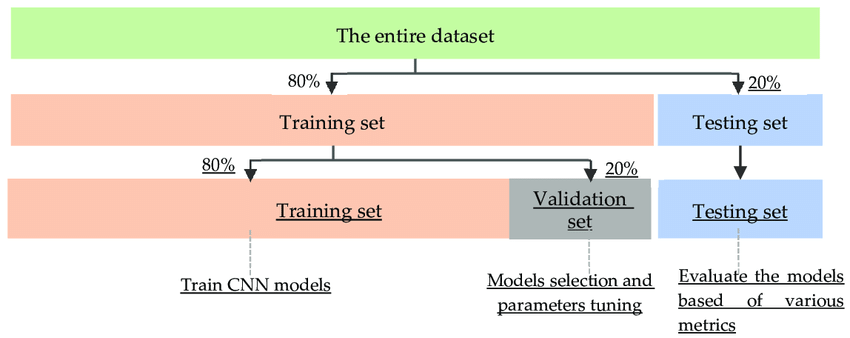

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
df = read_csv('housing.csv', header=None)
display(df)
display(df.describe().T)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


,count,mean,std,min,25%,50%,75%,max
0,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
1,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
2,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
3,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
4,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
5,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
6,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
7,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
8,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
9,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


In [ ]:
# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


In [ ]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


## Data Preparation Without Data Leakage

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


### Train-Test Evaluation With Naive Data Preparation

In [ ]:
# naive approach to normalizing the data before splitting the data and evaluating the model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Accuracy: 84.848


### Train-Test Evaluation With Correct Data Preparation

In [ ]:
# correct approach for normalizing the data after the data is split before the model is evaluated
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define the scaler
scaler = MinMaxScaler()
# fit on the training dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test = scaler.transform(X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Accuracy: 85.455


### Data Preparation With k-fold Cross-Validation

In [ ]:
# naive data preparation for model evaluation with k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# define the model
model = LogisticRegression()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 85.300 (3.607)


### Cross-Validation Evaluation With Correct Data Preparation

In [ ]:
# correct data preparation for model evaluation with k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 85.433 (3.471)


## Variables categóricas

In [ ]:
# Encoding categorical data
# define dataset
data = {'blood_type': ['a', 'ab', 'b', 'b', 'a'], 'eye_color': ['brown', 'blue', 'brown', 'green', 'blue']}
df = pd.DataFrame(data)
print(df)
# encode blood type
blood_type_mapping = {'a': 1, 'ab': 2, 'b': 3}
df['blood_type'] = df['blood_type'].map(blood_type_mapping)
# encode eye color
eye_color_mapping = {'brown': 1, 'blue': 2, 'green': 3}
df['eye_color'] = df['eye_color'].map(eye_color_mapping)
# display encoded data
print(df)

  blood_type eye_color
0          a     brown
1         ab      blue
2          b     brown
3          b     green
4          a      blue
   blood_type  eye_color
0           1          1
1           2          2
2           3          1
3           3          3
4           1          2


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# create a dataframe with categorical data
data = {'blood_type': ['a', 'ab', 'b', 'b', 'a'], 'eye_color': ['brown', 'blue', 'brown', 'green', 'blue']}
df = pd.DataFrame(data)
print(df)
# create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# fit the encoder to the categorical data
encoded_data = encoder.fit_transform(df[['blood_type', 'eye_color']])

# convert the encoded data to a dataframe
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())

# display the encoded dataframe
print(encoded_df)


  blood_type eye_color
0          a     brown
1         ab      blue
2          b     brown
3          b     green
4          a      blue
   blood_type_a  blood_type_ab  blood_type_b  eye_color_blue  eye_color_brown  \
0           1.0            0.0           0.0             0.0              1.0   
1           0.0            1.0           0.0             1.0              0.0   
2           0.0            0.0           1.0             0.0              1.0   
3           0.0            0.0           1.0             0.0              0.0   
4           1.0            0.0           0.0             1.0              0.0   

   eye_color_green  
0              0.0  
1              0.0  
2              0.0  
3              1.0  
4              0.0  


https://machinelearningmastery.com/rfe-feature-selection-in-python/

## Referencias

- https://www.freecodecamp.org/espanol/news/limpieza-de-datos-en-pandas-explicado-con-ejemplos/
- https://lauralpezb.medium.com/limpieza-de-datos-con-python-48d436ca9ace